# Создание БД, таблицы, импорт данных

In [1]:
import csv,sqlite3

# Подключение к SQLite БД с уже загруженными данными
conn = sqlite3.connect('db_ForBelhardCourses.db')
cursor = conn.cursor()

# проверка таблиц в БД
cursor.execute("select * from sqlite_master;")
results = cursor.fetchall()
print('Исходные таблицы в БД')
for result in results:
    print(result)

# Создание копии таблицы, но с ключом PRIMARY KEY
cursor.execute('''CREATE TABLE IF NOT EXISTS "titanic_copy" (
	"id"	INTEGER NOT NULL,
	"Survived"	INTEGER,
	"Pclass"	INTEGER,
	"Name"	TEXT,
	"Sex"	TEXT,
	"Age"	INTEGER,
	"SiblingsSpouses"	INTEGER,
	"ParentsChildren"	INTEGER,
	"Fare"	REAL,
	PRIMARY KEY("id" AUTOINCREMENT))''')

# Подготавливаем файл csv для вставки в БД
with open('titanic.csv') as file:
    data_list = [row for row in csv.reader(file)]
data_list_for_imort = tuple(data_list)
#print(data_list_for_imort[1:])

# вставка в БД
cursor.executemany("INSERT INTO titanic_copy ('Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SiblingsSpouses', 'ParentsChildren', 'Fare') VALUES (?, ?, ?, ?, ?, ?, ?, ?);", data_list_for_imort[1:])

cursor.execute("SELECT * FROM titanic_copy LIMIT 10;")
results = cursor.fetchall()
print('Копия таблицы')
for result in results:
    print(result)

#cursor.execute("DROP TABLE titanic_copy;")



Исходные таблицы в БД
('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')
('table', 'titanic', 'titanic', 2, 'CREATE TABLE "titanic" (\n\t"Survived"\tINTEGER,\n\t"Pclass"\tINTEGER,\n\t"Name"\tTEXT,\n\t"Sex"\tTEXT,\n\t"Age"\tINTEGER,\n\t"SiblingsSpouses"\tINTEGER,\n\t"ParentsChildren"\tINTEGER,\n\t"Fare"\tREAL\n)')
Копия таблицы
(1, 0, 3, 'Mr. Owen Harris Braund', 'male', 22, 1, 0, 7.25)
(2, 1, 1, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings', 'female', 38, 1, 0, 71.2833)
(3, 1, 3, 'Miss. Laina Heikkinen', 'female', 26, 0, 0, 7.925)
(4, 1, 1, 'Mrs. Jacques Heath (Lily May Peel) Futrelle', 'female', 35, 1, 0, 53.1)
(5, 0, 3, 'Mr. William Henry Allen', 'male', 35, 0, 0, 8.05)
(6, 0, 3, 'Mr. James Moran', 'male', 27, 0, 0, 8.4583)
(7, 0, 1, 'Mr. Timothy J McCarthy', 'male', 54, 0, 0, 51.8625)
(8, 0, 3, 'Master. Gosta Leonard Palsson', 'male', 2, 3, 1, 21.075)
(9, 1, 3, 'Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson', 'female', 27, 0, 2, 11

# Несколько SQL-запросов

In [2]:
# Выборка с фильтрацией
cursor.execute("SELECT * FROM titanic WHERE Survived=1 AND Age<=18 limit 5")
results = cursor.fetchall()
print('Выжившие несовершенолетние:')
for result in results:
    print(result)

# Агрегатные функции (SUM, AVG, COUNT)
cursor.execute(" SELECT count(*) FROM titanic_copy  GROUP BY Fare HAVING Fare>AVG(Fare);")
results = cursor.fetchone()
print('Количество пассажиров со стоимостью билета выше среднего:', results)

cursor.execute(" SELECT sum(SiblingsSpouses)+sum(ParentsChildren) FROM titanic_copy  WHERE Survived=0;")
results = cursor.fetchall()
print('Количество родствеников у невыживших:', results)

# Вставка 1
cursor.execute("INSERT INTO titanic_copy(Survived,Name,Age) VALUES(1,'Jack',22),(1,'Rose',17);")
# Вставка 2
data = [
    ('0', 'Filip','Male',50),
    ('1', 'Kitty','Female',50)
      ]
cursor.executemany("INSERT INTO titanic_copy (Survived,Name,Sex,Age) VALUES (?, ?, ?, ?)", data)
 # Обновление данных
cursor.execute("UPDATE titanic_copy SET Survived = ?, Sex = ? WHERE Name = ?",(0, 'Male', 'Jack'))

cursor.execute("SELECT * FROM titanic_copy ORDER BY id DESC LIMIT 4")
results = cursor.fetchall()
print('После вставки и обновления')
for result in results:
   print(result)

# Удаление данных
results=cursor.execute("DELETE FROM titanic_copy WHERE NAME='Jack'")
results=cursor.execute("SELECT * FROM titanic_copy ORDER BY id DESC LIMIT 4")
print('После удаления')
results = cursor.fetchall()
for result in results:
    print(result)

# Закрытие соединения и сохранение изменений
conn.commit()
conn.close()

Выжившие несовершенолетние:
(1, 2, 'Mrs. Nicholas (Adele Achem) Nasser', 'female', 14, 1, 0, 30.0708)
(1, 3, 'Miss. Marguerite Rut Sandstrom', 'female', 4, 1, 1, 16.7)
(1, 3, 'Miss. Anna McGowan', 'female', 15, 0, 0, 8.0292)
(1, 3, 'Miss. Mary Agatha Glynn', 'female', 18, 0, 0, 7.75)
(1, 3, 'Mr. Hanna Mamee', 'male', 18, 0, 0, 7.2292)
Количество пассажиров со стоимостью билета выше среднего: (7,)
Количество родствеников у невыживших: [(485,)]
После вставки и обновления
(891, 1, None, 'Kitty', 'Female', 50, None, None, None)
(890, 0, None, 'Filip', 'Male', 50, None, None, None)
(889, 1, None, 'Rose', None, 17, None, None, None)
(888, 0, None, 'Jack', 'Male', 22, None, None, None)
После удаления
(891, 1, None, 'Kitty', 'Female', 50, None, None, None)
(890, 0, None, 'Filip', 'Male', 50, None, None, None)
(889, 1, None, 'Rose', None, 17, None, None, None)
(887, 0, 3, 'Mr. Patrick Dooley', 'male', 32, 0, 0, 7.75)


# Визуализации

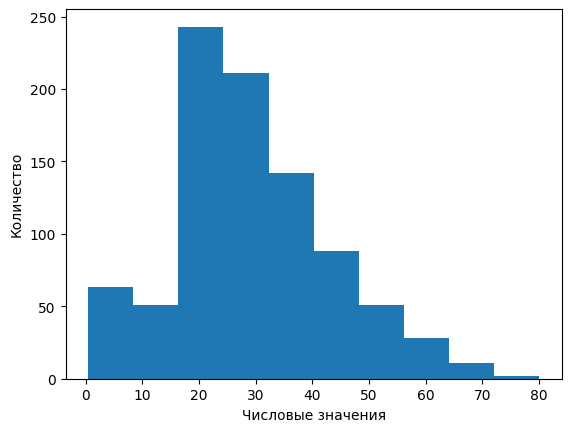

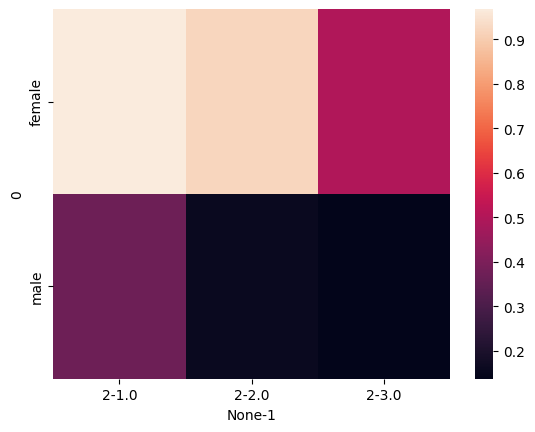

In [ ]:
import visualization as vi
import pandas as pd

conn = sqlite3.connect('db_ForBelhardCourses.db')
cursor = conn.cursor()

cursor.execute("SELECT Age FROM titanic_copy")
results = cursor.fetchall()
df = pd.DataFrame(results)
# Гистограмма для просмотра возвраста пассажиров
vi.visual_field(df[0])

cursor.execute("SELECT Sex,Pclass,Survived FROM titanic_copy")
results = cursor.fetchall()
df = pd.DataFrame(results)
# Сводные таблица Демонстрация статистики выживших в зависимости от пола и класса
vi.visual_piv(df,df[0],df[1],df[2])

conn.commit()
conn.close()